## Remove the outliers from the dataset

Carry out an analysis of the dataset features to identify and remove outlier values

The following steps were carried out

- 1 Check and visualise the data points for each feature
- 2 Remove the outliers from each feature
- 3 Review the dataset after the outliers have been removed

### 1 Check and visualise the data points for each feature

In [66]:
#check the dataset size prior to checking for outliers

new_dataset.shape

(23770, 15)

In [67]:
#check for outliers in dataset features

# Boxplot to visualize Data using a function 

def boxplot(new_dataset,feature):
    new_dataset.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

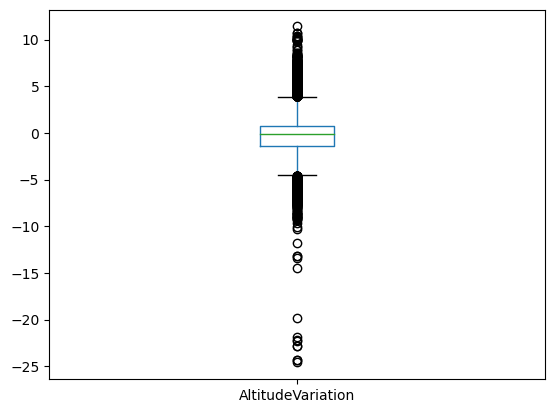

None


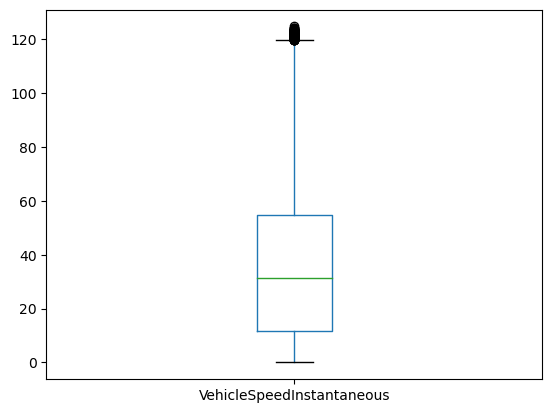

None


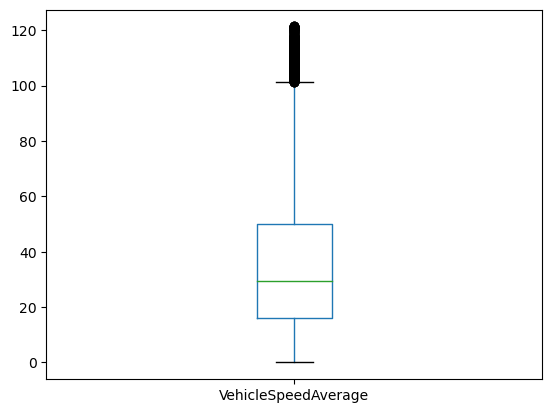

None


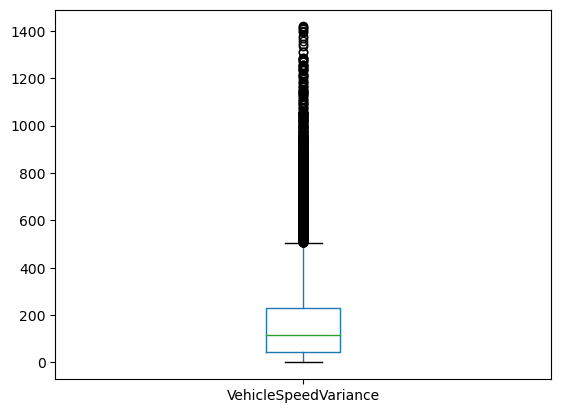

None


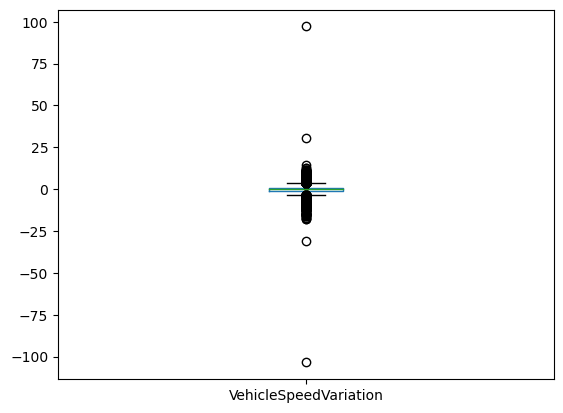

None


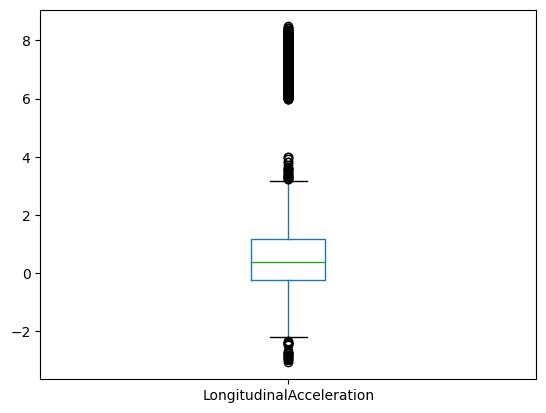

None


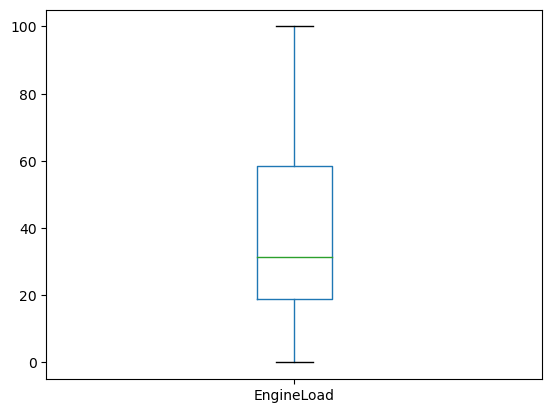

None


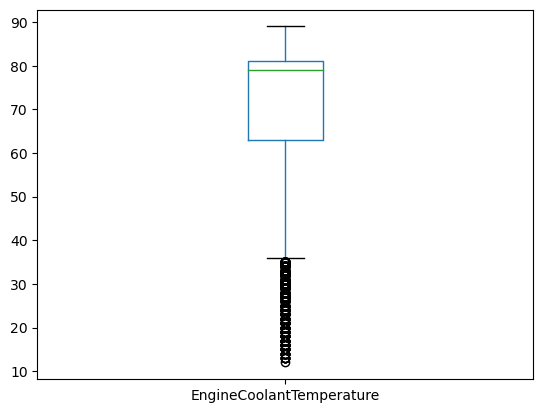

None


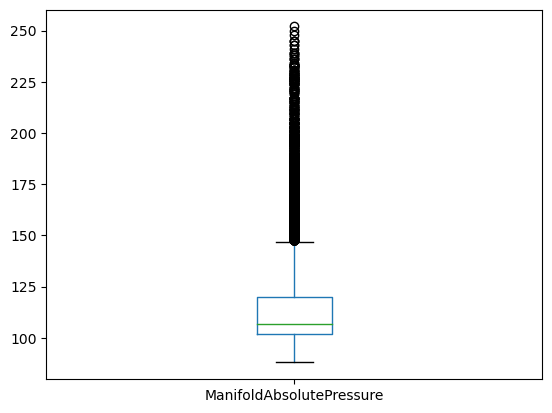

None


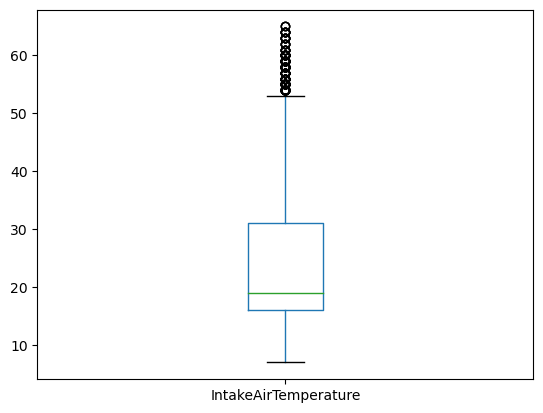

None


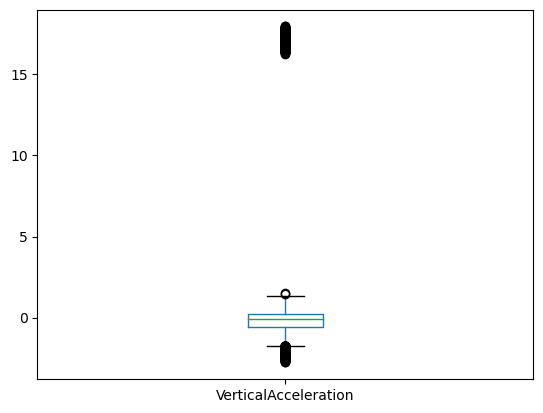

None


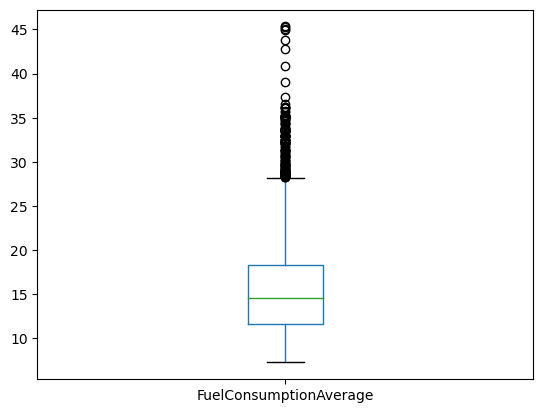

None


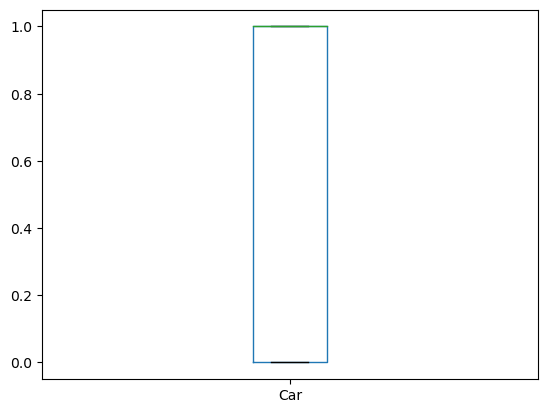

None


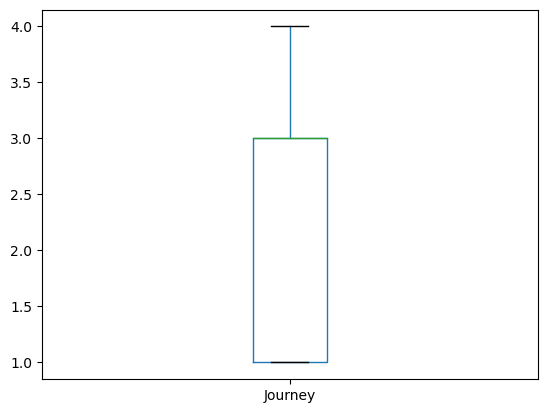

None


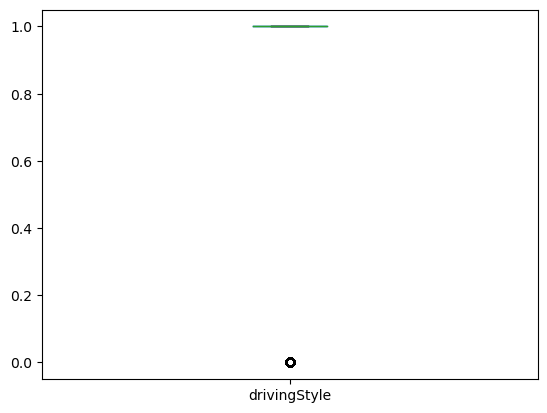

None


In [68]:
#create boxplots for each feature to show outliers

for feature in new_dataset:
    print(boxplot(new_dataset,feature))

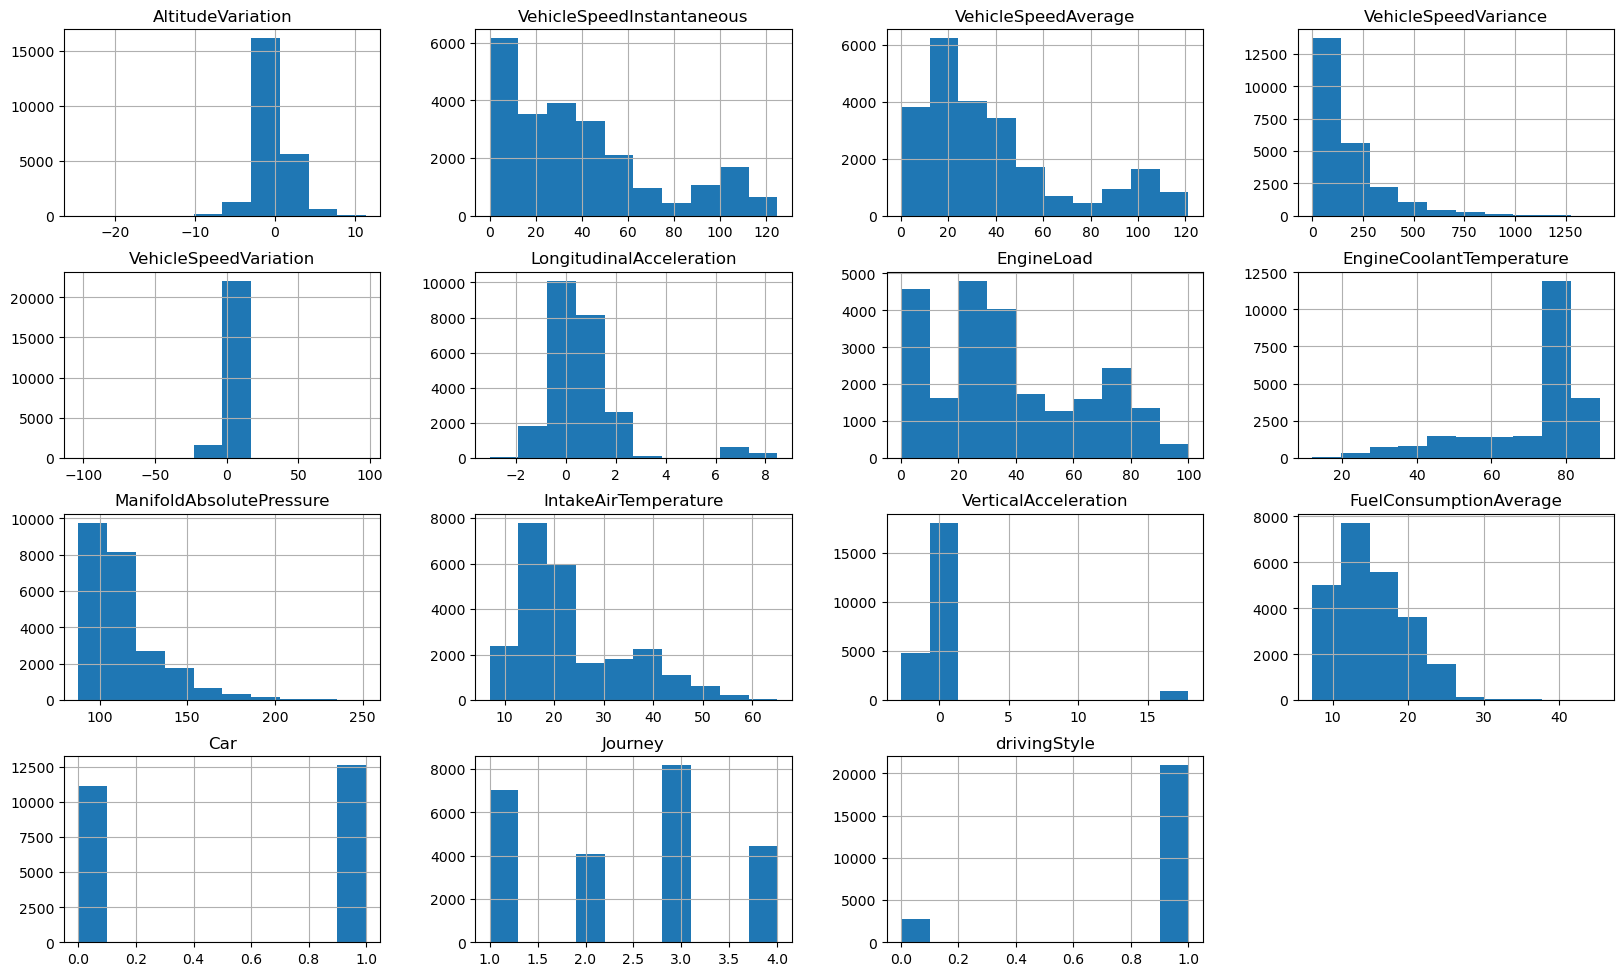

In [69]:
#visualise the features in histogram format before removing outliers

new_dataset.hist(layout=(5,4), figsize=(20,15))

plt.show()

### 2 Remove the outliers from each feature

In [70]:
#create a function to remove the outliers

df = pd.DataFrame(new_dataset)

# Define a function to remove outliers using the IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Identify numeric columns to remove outliers from
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Exclude binary classification columns
classification_columns = ['drivingStyle','Car','Journey']  # Add more if needed

# Remove outliers only from numeric columns
for col in numeric_columns:
    if col not in classification_columns:
        df[col] = remove_outliers(df[col])

# Now, df contains the original data with outliers removed from numeric columns while preserving the binary classification columns.

In [71]:
df.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey,drivingStyle
count,22502.000000,23640.000000,21782.000000,22348.000000,21545.000000,22780.000000,23770.000000,22587.000000,21878.000000,23495.000000,22385.000000,23634.000000,23770.000000,23770.000000,23770.000000
mean,-0.324700,38.181586,32.422871,137.857997,0.045529,0.415750,36.762356,73.041174,110.537115,23.088019,-0.193812,15.071198,0.531763,2.422718,0.883929
std,1.583424,33.392537,23.843707,118.417321,1.430490,0.896976,26.640593,12.580712,11.952718,10.328469,0.555678,4.415122,0.499001,1.100154,0.320316
min,-4.500000,0.000000,0.000000,0.000000,-3.600002,-2.200000,0.000000,36.000000,88.000000,7.000000,-1.740200,7.271883,0.000000,1.000000,0.000000
25%,-1.299999,11.259000,15.246562,43.428813,-0.899998,-0.238300,18.823530,68.000000,102.000000,16.000000,-0.543500,11.657566,0.000000,1.000000,1.000000
50%,-0.099998,31.500000,26.631896,103.825395,0.000000,0.340000,31.372549,79.000000,106.000000,19.000000,-0.094400,14.492782,1.000000,3.000000,1.000000
75%,0.599998,54.268379,43.383509,203.553012,0.900000,1.050000,58.431374,81.000000,114.000000,30.000000,0.202900,18.121615,1.000000,3.000000,1.000000
max,3.800049,119.570579,101.402304,506.421168,3.600002,3.174500,100.000000,89.000000,147.000000,53.000000,1.346200,28.149389,1.000000,4.000000,1.000000


In [72]:
df.isna().sum()

AltitudeVariation            1268
VehicleSpeedInstantaneous     130
VehicleSpeedAverage          1988
VehicleSpeedVariance         1422
VehicleSpeedVariation        2225
LongitudinalAcceleration      990
EngineLoad                      0
EngineCoolantTemperature     1183
ManifoldAbsolutePressure     1892
IntakeAirTemperature          275
VerticalAcceleration         1385
FuelConsumptionAverage        136
Car                             0
Journey                         0
drivingStyle                    0
dtype: int64

In [73]:
#remove the missing values (NaNs)

df_no_nan = df.dropna()

In [74]:
#check the dataframe for missing values

df_no_nan.isna().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
Car                          0
Journey                      0
drivingStyle                 0
dtype: int64

In [79]:
#check the new dataframe structure

df_no_nan.shape

(15062, 15)

In [75]:
df_no_nan.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey,drivingStyle
count,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.00000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000
mean,-0.320529,29.279122,29.218030,145.174728,0.009229,0.371484,32.548708,71.816558,109.14925,22.969858,-0.196887,15.486597,0.551188,2.463551,0.889855
std,1.495935,25.447507,21.251911,117.795082,1.434002,0.868683,24.586986,13.027753,10.69832,9.339776,0.549763,4.118056,0.497389,1.155625,0.313080
min,-4.500000,0.000000,0.000000,0.000000,-3.600002,-2.101800,0.000000,36.000000,88.00000,8.000000,-1.740200,7.307876,0.000000,1.000000,0.000000
25%,-1.200012,5.400000,14.227623,50.828606,-0.900000,-0.273000,15.686275,64.000000,102.00000,16.000000,-0.528850,12.471350,0.000000,1.000000,1.000000
50%,-0.099976,27.000000,24.422261,113.302748,0.000000,0.288000,29.411766,79.000000,105.00000,20.000000,-0.085000,14.875591,1.000000,3.000000,1.000000
75%,0.500000,45.000000,40.828782,212.241537,0.899998,0.992100,43.921570,80.000000,111.00000,30.000000,0.191400,18.232169,1.000000,3.000000,1.000000
max,3.800049,119.570579,101.354997,506.421168,3.600002,3.171200,100.000000,87.000000,147.00000,53.000000,1.346200,28.054390,1.000000,4.000000,1.000000


The dataset has been reduced to 15062 rows from 23770 rows, ~ 63% of the "new_dataset"

In [76]:
# Boxplot to visualize Data using a function 

def boxplot(df_no_nan,feature):
    df_no_nan.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

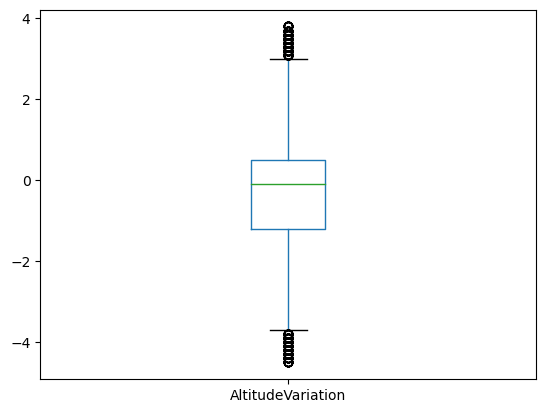

None


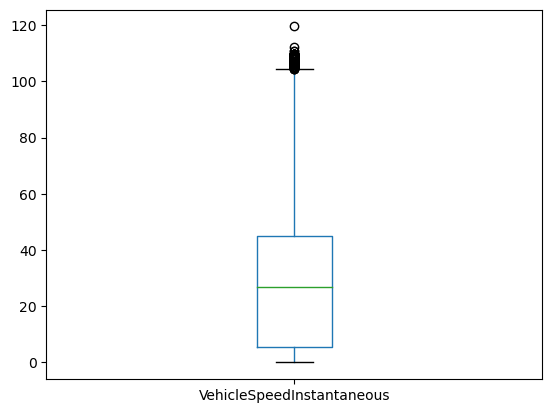

None


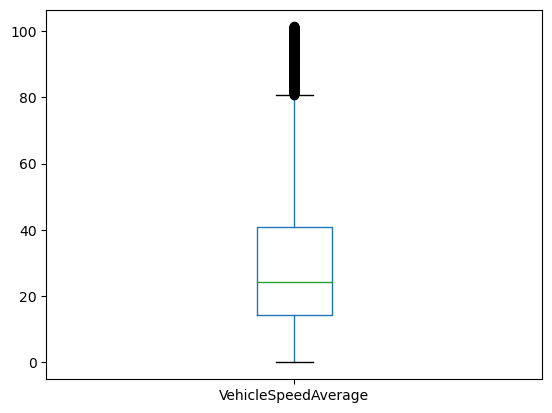

None


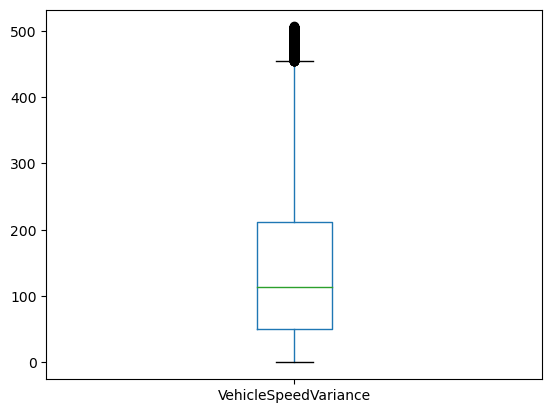

None


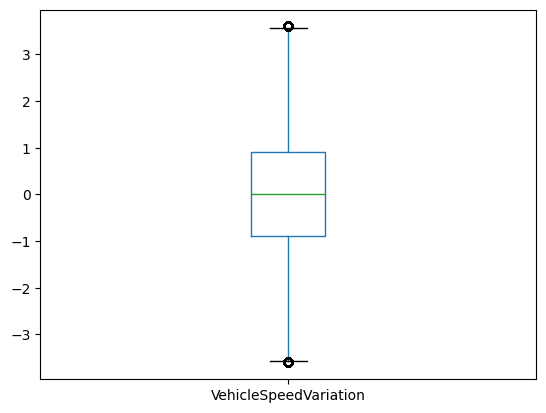

None


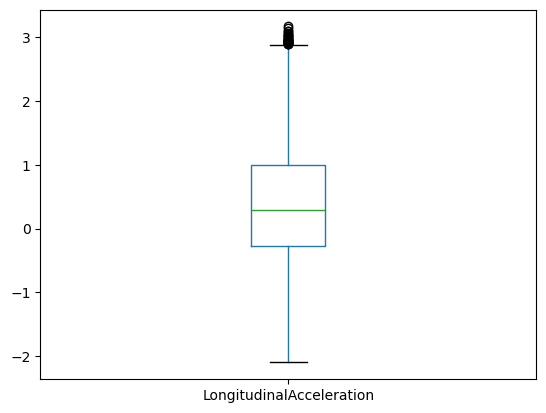

None


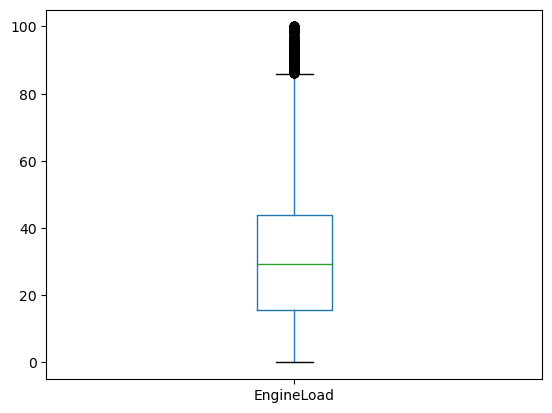

None


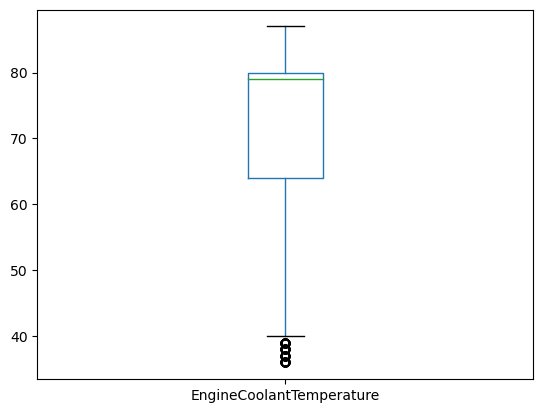

None


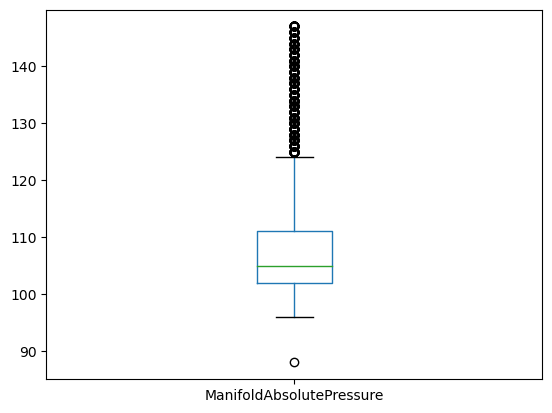

None


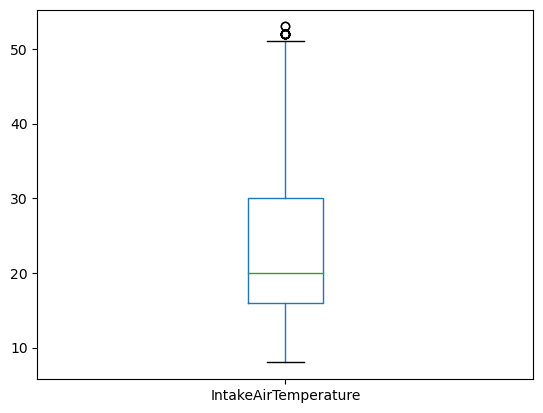

None


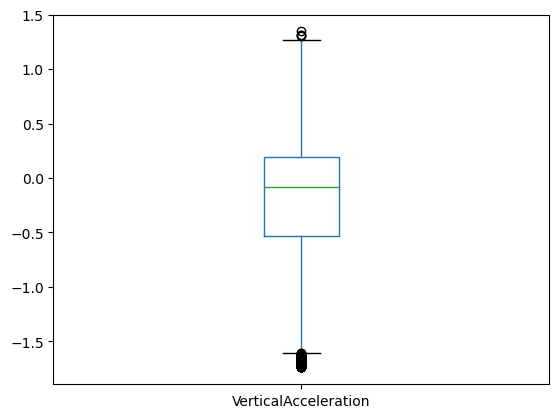

None


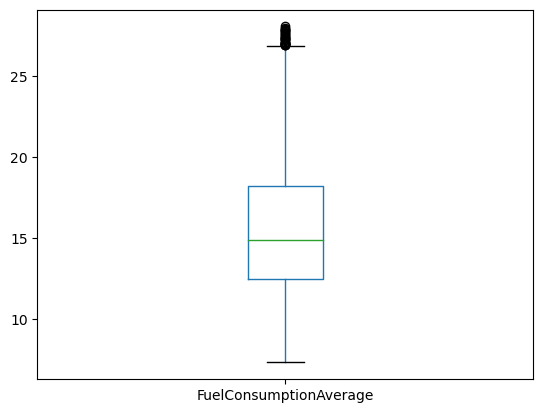

None


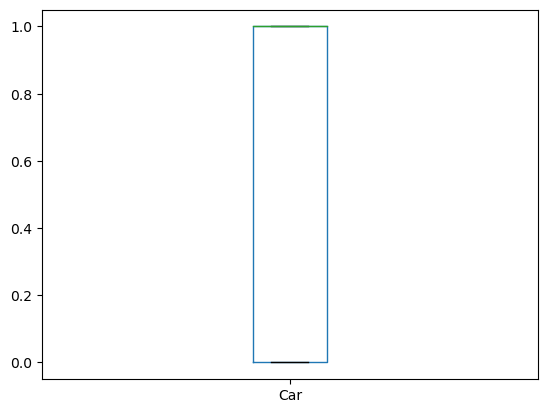

None


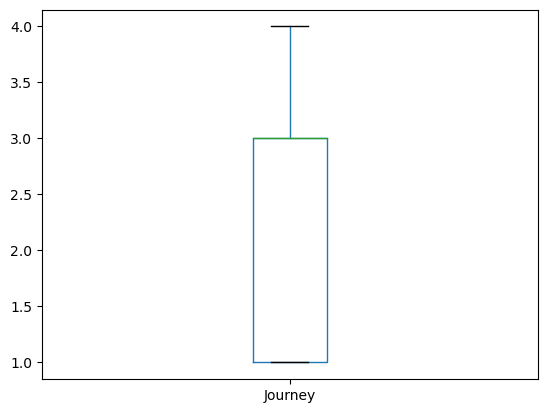

None


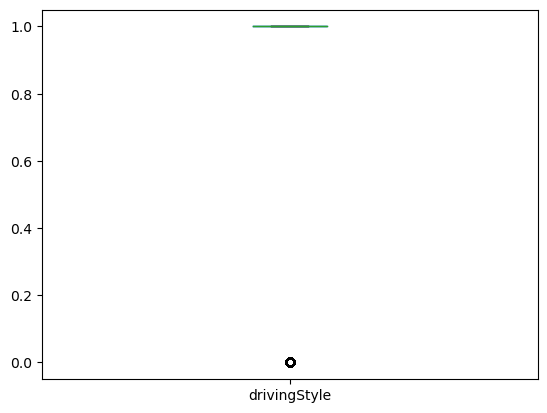

None


In [77]:
#create boxplots for each feature to check for outliers again

for feature in df_no_nan:
    print(boxplot(df_no_nan,feature))

### 3 Review the dataset after the outliers have been removed

In [78]:
#check the dataset after removal of outliers via IQR

df_no_nan.shape

(15062, 15)

This resulted in a reduction in the dataset to leave 63% (15062/23770 x 100) records

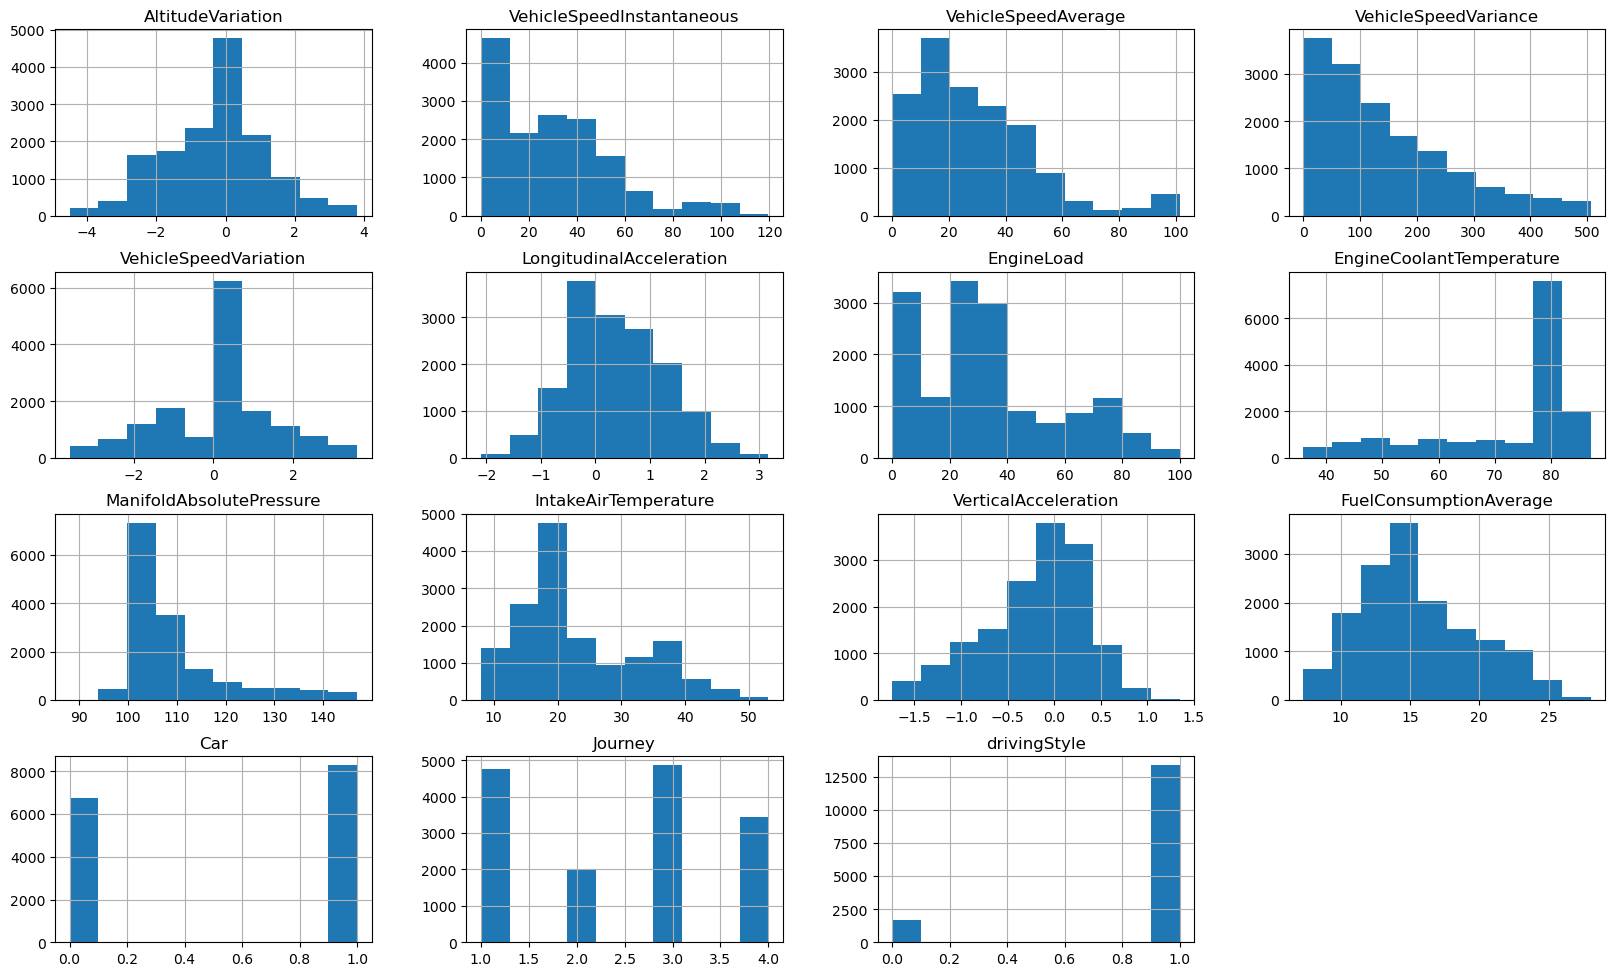

In [79]:
#visualise the features in histogram format after removing outliers Note: shape does not change after removing outliers

df_no_nan.hist(layout=(5,4), figsize=(20,15))

plt.show()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

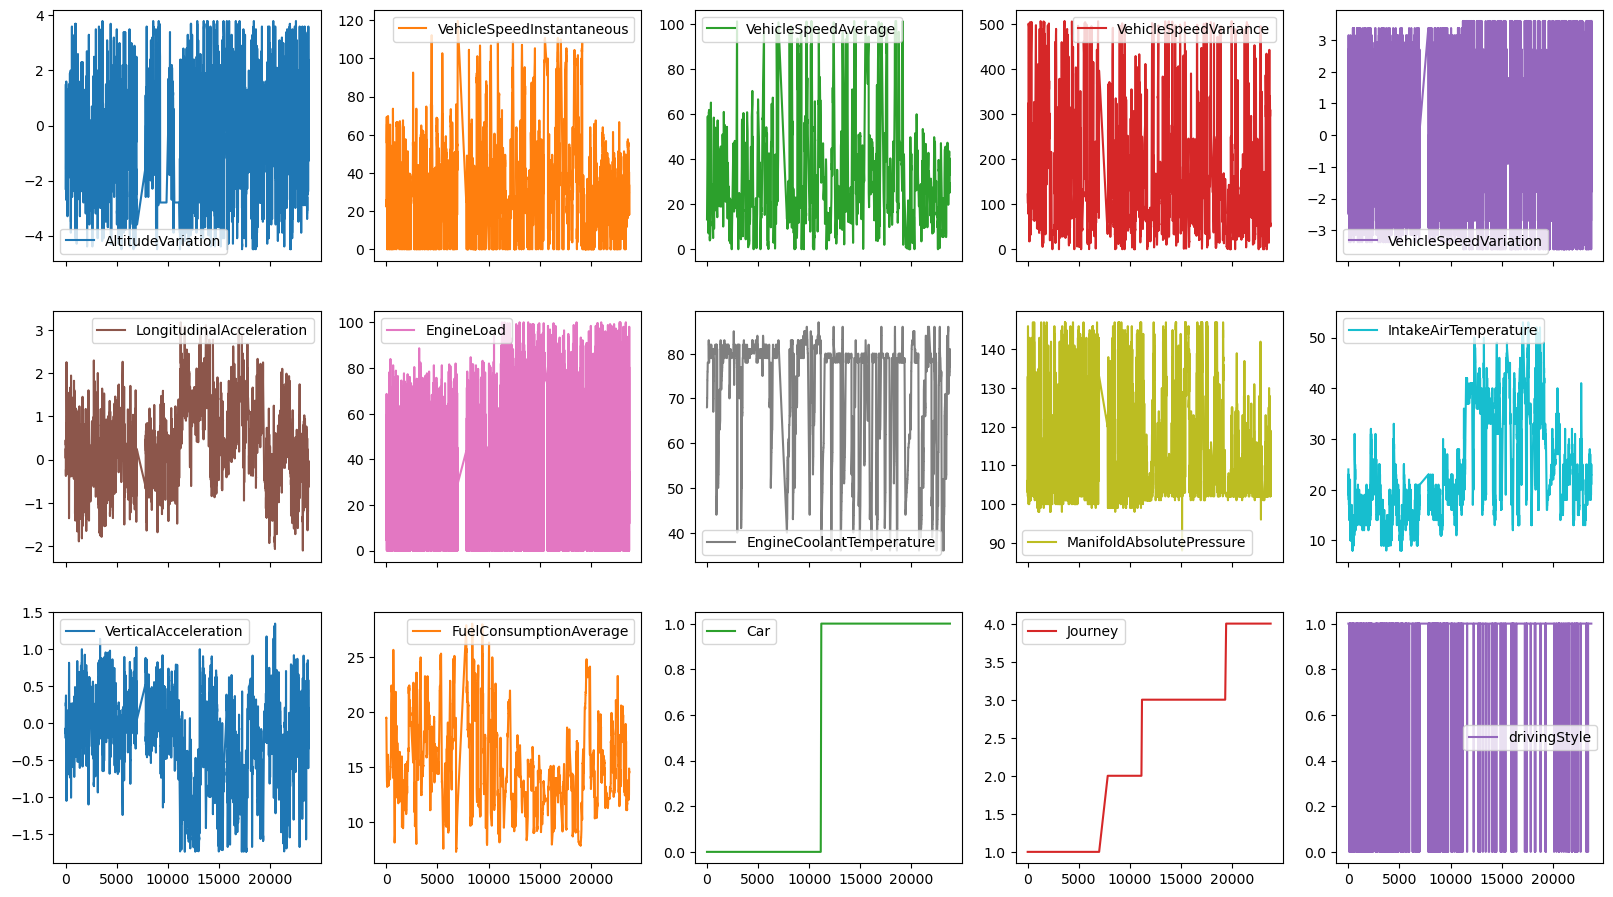

In [80]:
#visualise the plots of each feature after removal of outliers

df_no_nan.plot(subplots=True, layout=(4,5), figsize=(20,15))

In [81]:
#check the parameters for the revised dataset

df_no_nan.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey,drivingStyle
count,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.00000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000,15062.000000
mean,-0.320529,29.279122,29.218030,145.174728,0.009229,0.371484,32.548708,71.816558,109.14925,22.969858,-0.196887,15.486597,0.551188,2.463551,0.889855
std,1.495935,25.447507,21.251911,117.795082,1.434002,0.868683,24.586986,13.027753,10.69832,9.339776,0.549763,4.118056,0.497389,1.155625,0.313080
min,-4.500000,0.000000,0.000000,0.000000,-3.600002,-2.101800,0.000000,36.000000,88.00000,8.000000,-1.740200,7.307876,0.000000,1.000000,0.000000
25%,-1.200012,5.400000,14.227623,50.828606,-0.900000,-0.273000,15.686275,64.000000,102.00000,16.000000,-0.528850,12.471350,0.000000,1.000000,1.000000
50%,-0.099976,27.000000,24.422261,113.302748,0.000000,0.288000,29.411766,79.000000,105.00000,20.000000,-0.085000,14.875591,1.000000,3.000000,1.000000
75%,0.500000,45.000000,40.828782,212.241537,0.899998,0.992100,43.921570,80.000000,111.00000,30.000000,0.191400,18.232169,1.000000,3.000000,1.000000
max,3.800049,119.570579,101.354997,506.421168,3.600002,3.171200,100.000000,87.000000,147.00000,53.000000,1.346200,28.054390,1.000000,4.000000,1.000000


In [82]:
df_no_nan.isna().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
Car                          0
Journey                      0
drivingStyle                 0
dtype: int64

The table illustrates the different value ranges, mean,max, min, standard deviations. Different magnitudes and scales. So the next step is to standardise the dataset features.